In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics
# This library is needed to save RF model
import joblib

In [ ]:
# I need to use this version because Matlab has this version as well
!pip install scikit-learn==1.3.0

In [ ]:
dataset = pd.read_csv('/content/NewDataset.csv')

In [ ]:
dataset[0]

,X_Ball,Y_Ball,Z_Ball,X_Turtle,Y_Turtle,Z_Turtle,X_dist,Y_dist,Z_dist,distance,Touch
0,3.383389,0.348828,-0.691635,3.318426,0.784487,-0.501994,0.064963,-0.435659,-0.189641,0.479565,1
1,1.329033,0.680239,0.789423,1.192222,0.782396,0.885769,0.136811,-0.102157,-0.096346,0.196051,1
2,1.462441,0.433671,0.971000,1.192347,0.782068,0.885928,0.270094,-0.348397,0.085072,0.448964,1
3,3.176876,0.436285,-0.855416,3.310484,0.784078,-0.506026,-0.133608,-0.347793,-0.349390,0.510768,0
4,1.229987,0.515186,1.068699,1.192407,0.782217,0.885434,0.037580,-0.267031,0.183265,0.326043,1


## Data Preprocessing


In [ ]:
row_number, col_number = dataset.shape
print(f'The dataset contains {row_number} rows and {col_number} columns.')

The dataset contains 843 rows and 11 columns.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_Ball    843 non-null    float64
 1   Y_Ball    843 non-null    float64
 2   Z_Ball    843 non-null    float64
 3   X_Turtle  843 non-null    float64
 4   Y_Turtle  843 non-null    float64
 5   Z_Turtle  843 non-null    float64
 6   X_dist    843 non-null    float64
 7   Y_dist    843 non-null    float64
 8   Z_dist    843 non-null    float64
 9   distance  843 non-null    float64
 10  Touch     843 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 72.6 KB


In [ ]:
# Check for duplicate values
dataset[dataset.duplicated()]
# or  dataset[dataset.duplicated()].sum()

,X_Ball,Y_Ball,Z_Ball,X_Turtle,Y_Turtle,Z_Turtle,X_dist,Y_dist,Z_dist,distance,Touch


As we can see above, there isn't any duplicated record in the dataset.

In [ ]:
# Check missing values
null_columns = dataset.columns[dataset.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(dataset[null_columns].isnull().sum())

List of columns consisting null values and their quantity:
Series([], dtype: float64)


There is no missing values in this dataset.

**Data Distribution**

Here, the distribution of the values in each column of the dataset is shown.

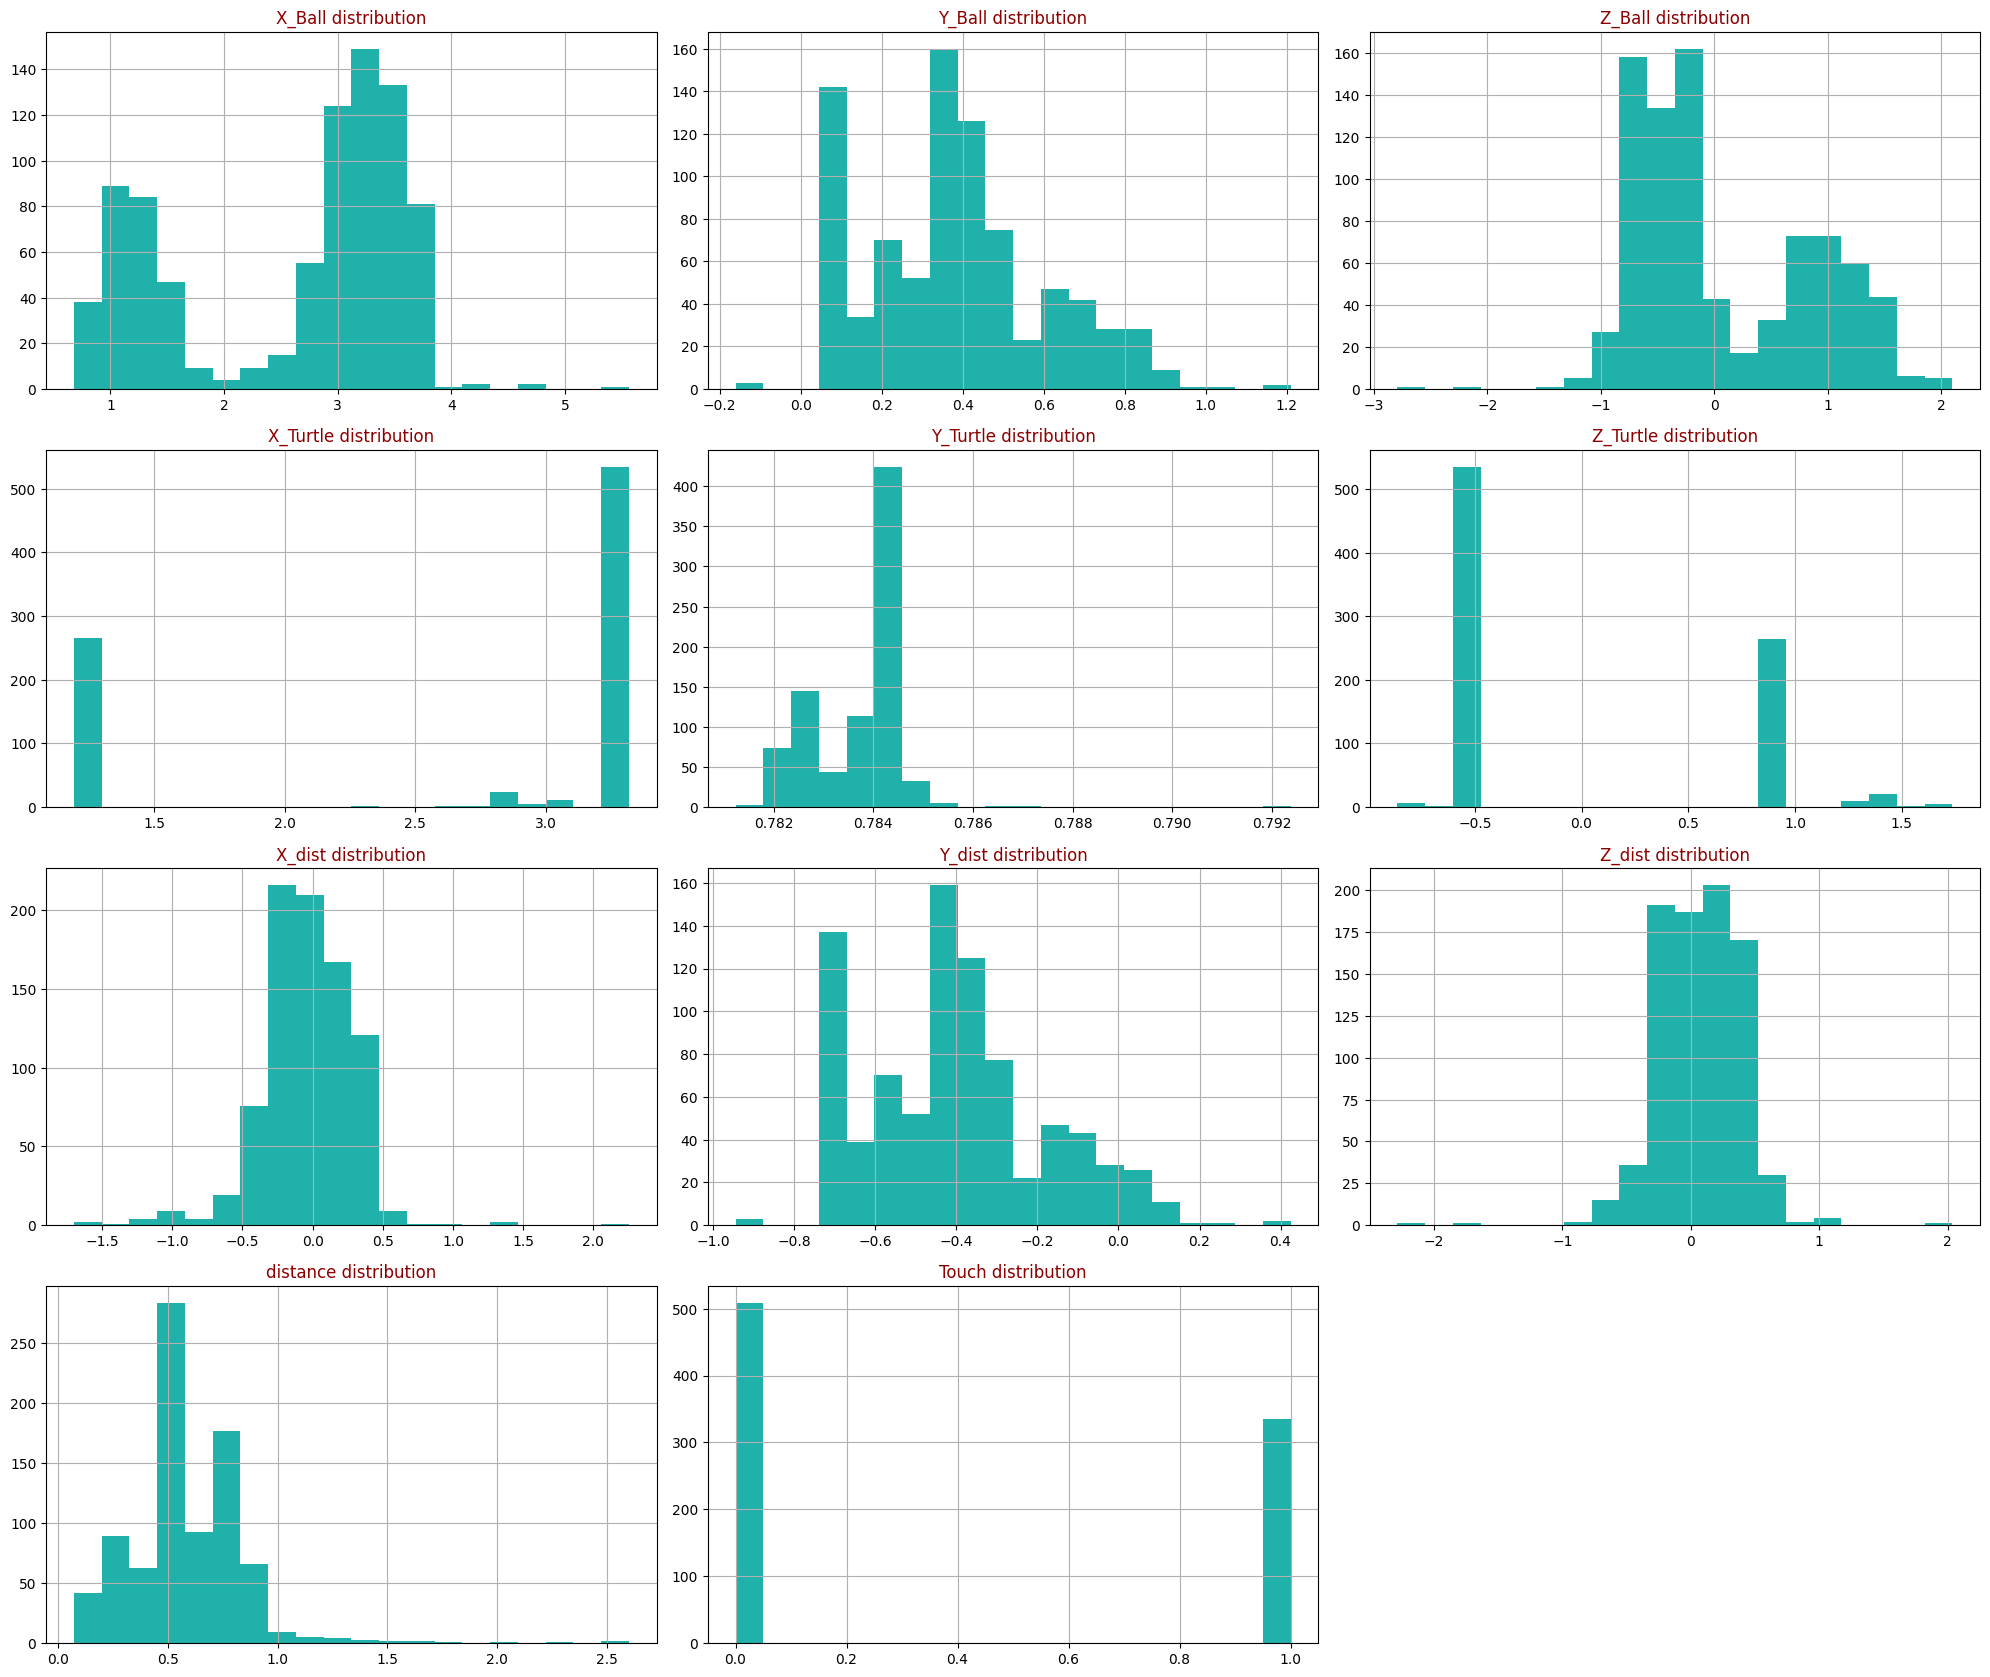

In [ ]:
fig=plt.figure(figsize=(20,25))

for index, column in enumerate(dataset.columns):
    ax = fig.add_subplot(6,3,index+1)
    dataset[column].hist(bins = 20, ax = ax, facecolor = 'LightSeaGreen')
    ax.set_title(column + " distribution",color = 'darkred')

fig.tight_layout()
plt.show()

**Check Correlation**

Showing the correlation between the features using a heatmap.

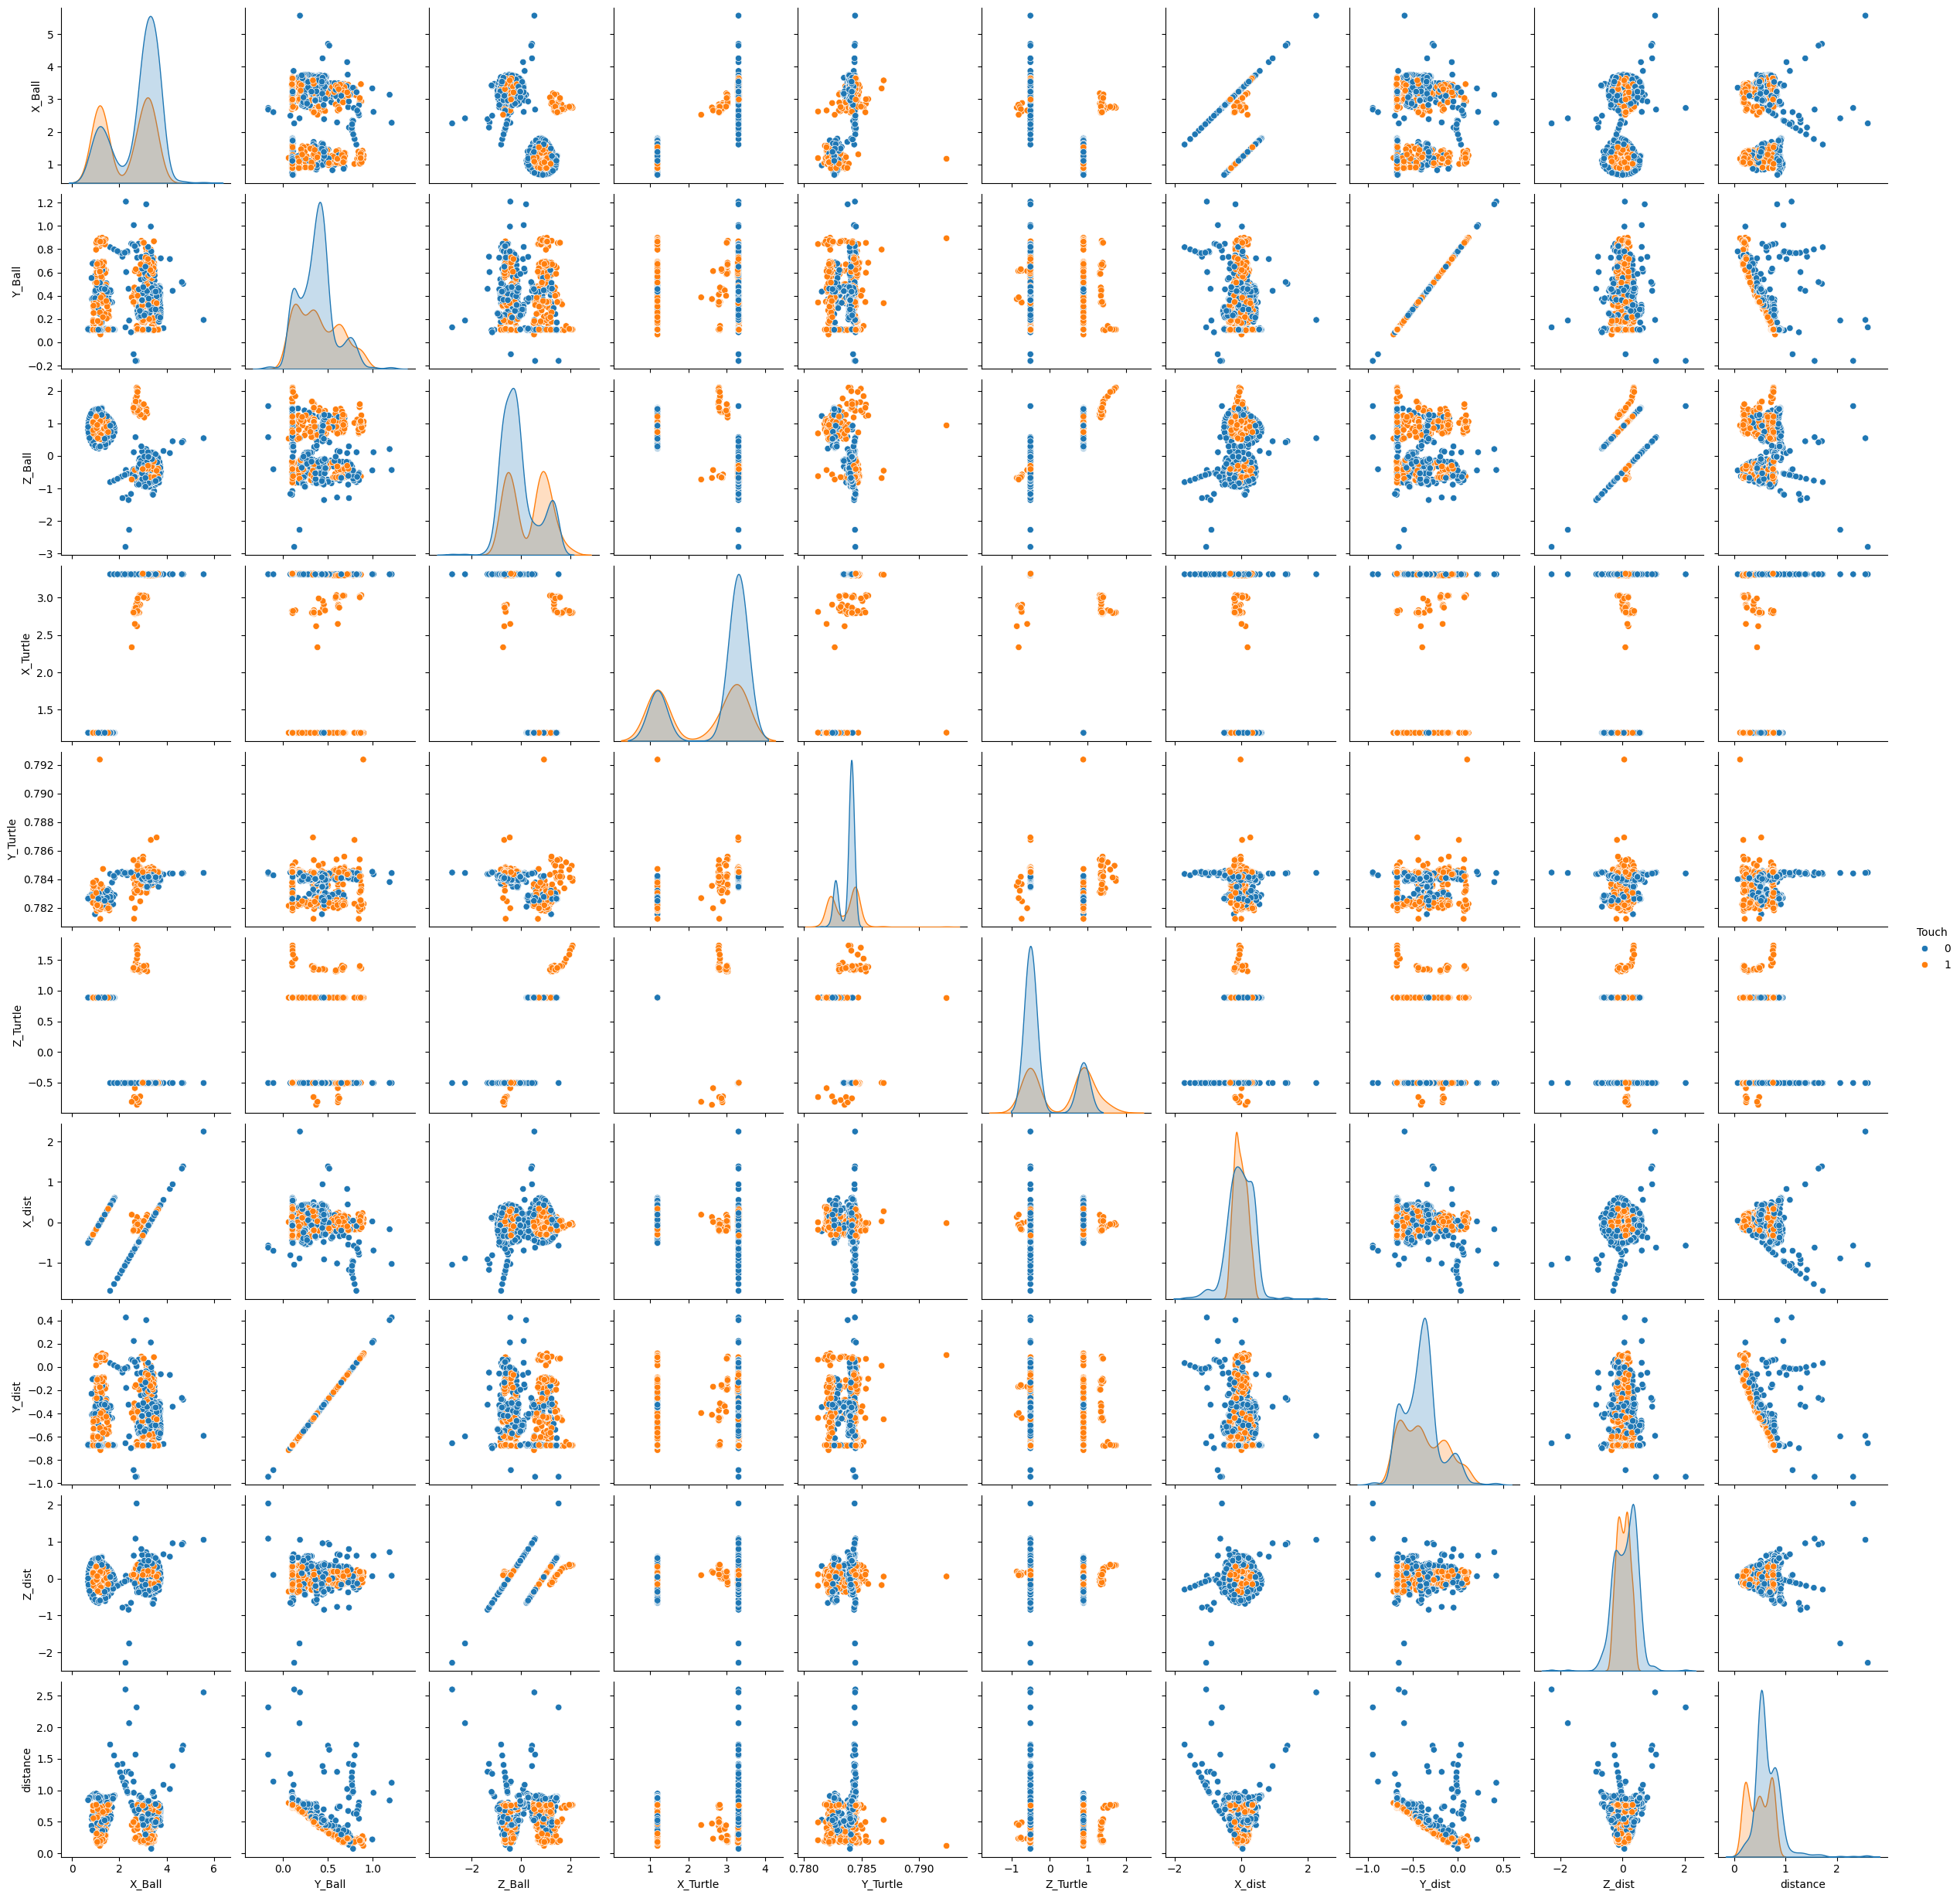

In [ ]:
sn.pairplot(dataset, hue='Touch')

**Checking Balancing**

In [ ]:
dataset.Touch.value_counts()

0    508
1    335
Name: Touch, dtype: int64

<ipython-input-15-706e5f012b4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Touch',data=dataset,palette=["#eb383b","#3853eb"])


<Axes: xlabel='Touch', ylabel='count'>

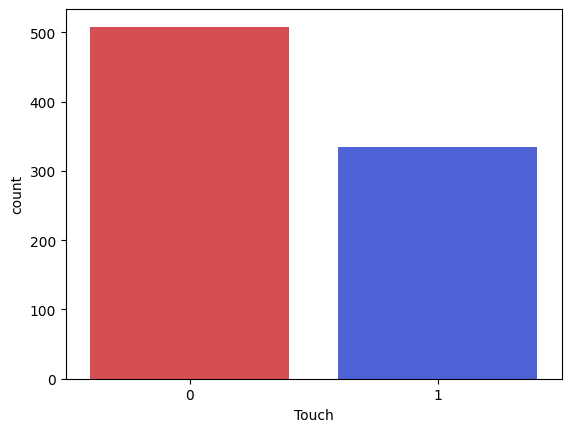

In [ ]:
sn.countplot(x='Touch',data=dataset,palette=["#eb383b","#3853eb"])

**Learning and Model Selection**

In [ ]:
# Separating target feature from the features
y = dataset['Touch']
X = dataset.drop(columns=['Touch'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
import random

# divide train test: 60 % - 20 % - 20%
X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_, test_size = 0.20, random_state= 21)

**Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifierRF = RandomForestClassifier(max_depth= 15,n_estimators=20)
classifierRF.fit(X_train, y_train)
y_pred_val_RF = classifierRF.predict(X_validation)
print("************Results for Random Forest*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_RF))

************Results for Random Forest*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.98      0.99        53

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(max_depth= 15,n_estimators=20)
classifierRF.fit(X_train, y_train)
y_pred_test_RF = classifierRF.predict(X_test)
print("************Results for Random Forest*************")
print("Confusion Matrix for test Set\n")
print(classification_report(y_test, y_pred_test_RF))

************Results for Random Forest*************
Confusion Matrix for test Set

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.97      0.99      0.98        67

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



pridict for different unseen data - 12-03-2024

In [ ]:
#  Define a function for feature extracting
def feature_extractor(file):
    # Reading Data
    data = pd.read_csv(file)
    # Choosing the ball and the turtle positions
    targeted_columns = data.iloc[1:, [5,6,7,12,13,14]][4:]
    # Define a header
    targeted_columns.columns=['X_Ball', 'Y_Ball', 'Z_Ball', 'X_Turtle', 'Y_Turtle', 'Z_Turtle']
    # Delete missing Values
    targeted_columns = targeted_columns.dropna()
    # Reset the index of the DataFrame
    targeted_columns = targeted_columns.reset_index(drop=True)
    cleaned_data = targeted_columns
    cleaned_data = cleaned_data.apply(pd.to_numeric)
    cleaned_data['X_dist']= cleaned_data['X_Ball'] - cleaned_data['X_Turtle']
    cleaned_data['Y_dist']= cleaned_data['Y_Ball'] - cleaned_data['Y_Turtle']
    cleaned_data['Z_dist']= cleaned_data['Z_Ball'] - cleaned_data['Z_Turtle']
    cleaned_data['distance'] =  np.sqrt(cleaned_data['X_dist']**2 + cleaned_data['Y_dist']**2 + cleaned_data['Z_dist']**2)
    return cleaned_data

**First Sample**

In [ ]:
test_data = feature_extractor('/content/NoTouch1.csv')

In [ ]:
test_data

,X_Ball,Y_Ball,Z_Ball,X_Turtle,Y_Turtle,Z_Turtle,X_dist,Y_dist,Z_dist,distance
0,0.115679,0.107229,1.050254,0.633941,0.004142,1.160638,-0.518262,0.103087,-0.110384,0.539821
1,0.115678,0.107219,1.050259,0.634043,0.004143,1.160730,-0.518365,0.103076,-0.110471,0.539936
2,0.115678,0.107230,1.050255,0.633519,0.004130,1.160143,-0.517841,0.103100,-0.109888,0.539318
3,0.115679,0.107247,1.050251,0.633706,0.004134,1.160332,-0.518027,0.103113,-0.110081,0.539539
4,0.115679,0.107242,1.050254,0.634012,0.004139,1.160738,-0.518333,0.103103,-0.110484,0.539913
...,...,...,...,...,...,...,...,...,...,...
599,1.513287,0.109077,-0.239286,0.640121,0.004257,1.161693,0.873166,0.104820,-1.400979,1.654131
600,1.516919,0.109094,-0.242038,0.638090,0.004274,1.159515,0.878829,0.104820,-1.401553,1.657612
601,1.524138,0.109126,-0.247492,0.639332,0.004215,1.158619,0.884806,0.104911,-1.406111,1.664643
602,1.527802,0.109143,-0.250253,0.640458,0.004191,1.159337,0.887344,0.104952,-1.409590,1.668933


In [ ]:
test_data['Touch'] = 1
test_data

,X_Ball,Y_Ball,Z_Ball,X_Turtle,Y_Turtle,Z_Turtle,X_dist,Y_dist,Z_dist,distance,Touch
0,3.034175,0.855720,1.586011,3.001537,0.784201,1.401693,0.032638,0.071519,0.184318,0.200383,1
1,3.034115,0.855716,1.586031,3.001554,0.784223,1.401711,0.032561,0.071493,0.184320,0.200363,1
2,3.034064,0.855685,1.586094,3.001567,0.784230,1.401724,0.032497,0.071455,0.184370,0.200385,1
3,3.034037,0.855579,1.586254,3.001582,0.784243,1.401741,0.032455,0.071336,0.184513,0.200467,1
4,3.034031,0.855541,1.586330,3.001588,0.784243,1.401750,0.032443,0.071298,0.184580,0.200514,1
...,...,...,...,...,...,...,...,...,...,...,...
11615,2.893680,0.347091,1.449289,2.996605,0.784633,1.245470,-0.102925,-0.437542,0.203819,0.493537,1
11616,2.893680,0.347091,1.449289,2.996605,0.784633,1.245470,-0.102925,-0.437542,0.203819,0.493537,1
11617,2.893680,0.347091,1.449289,2.996605,0.784633,1.245470,-0.102925,-0.437542,0.203819,0.493537,1
11618,2.893680,0.347091,1.449289,2.996605,0.784633,1.245470,-0.102925,-0.437542,0.203819,0.493537,1


In [ ]:
test_data_x = test_data.drop(columns=['Touch'], axis=1)
test_data_y = test_data['Touch']

In [ ]:
test_data_x.shape

(11620, 10)

In [ ]:
y_predRF_test = classifierRF.predict(test_data_x.iloc[[1000]])
y_predRF_test

array([1])

**Saving RF Model**

In [ ]:
joblib.dump(classifierRF, "RFClassifier")

['RFClassifier']

In [ ]:
RF_Classifier = joblib.load("RFClassifier")

In [ ]:
y_predRF_test = RF_Classifier.predict(test_data_x.iloc[[4]])
y_predRF_test

array([1])